In [3]:
import sys 
import pandas as pd 
import numpy as np 
import plotly.express as px 
import plotly as py  
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
import warnings 
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_excel("D:/rfm_analysis/Online Retail.xlsx") 
df.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [42]:
df.tail(5)

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

       InvoiceDate  UnitPrice  CustomerID Country  order_canceled  Revenue  
541904  2011-12-09       0.85     12680.0  France               0    10.20  
541905  2011-12-09       2.10     12680.0  France               0    12.60  
541906  2011-12-09       4.15     12680.0  France               0    16.60  
541907  2011-12-09       4.15     12680.0  France               0    16.60  
541908  2011-12-09       4.95     12680.0  France               0    14.85

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
df.shape

(541909, 8)

In [9]:
df.describe()

Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303

In [11]:
df.duplicated().sum()

5268

In [15]:
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')
    

display_missing(df)

InvoiceNo column missing values: 0
StockCode column missing values: 0
Description column missing values: 1454
Quantity column missing values: 0
InvoiceDate column missing values: 0
UnitPrice column missing values: 0
CustomerID column missing values: 135080
Country column missing values: 0




In [16]:
pd.DataFrame([{'products': len(df['StockCode'].value_counts()),
              'Transactions': len(df['InvoiceNo'].value_counts()),
              'customers': len(df['CustomerID'].unique().tolist()),}],columns=['products','Transactions','customers'], index= ['quantity'])

products  Transactions  customers
quantity      4070         25900       4373

In [20]:
cancelled = df['InvoiceNo'].astype(str).str.contains('C')
cancelled.fillna(0, inplace=True)
cancelled = cancelled.astype(int)
cancelled.value_counts()

InvoiceNo
0    532621
1      9288
Name: count, dtype: int64

In [21]:
df['order_canceled'] = cancelled
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  order_canceled  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom               0  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom               0  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom               0  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom               0  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom               0

In [22]:
n1 = df['order_canceled'].value_counts()[1]
n2 = df.shape[0]
print("Number of cancelled transactions:", n1)
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))
df = df[df['order_canceled'] == 0]

Number of cancelled transactions: 9288
Number of orders canceled: 9288/541909 (1.71%) 


In [24]:
df = df[df['CustomerID'].notna()]

In [28]:
print("Total number of transaction with negative quantity:", df[df['Quantity'] <= 0 ]['Quantity'].count())
print("Precentage of transactions with zero or negative quantity" ,round(len(df[df['Quantity']<=0])/len(df)*100, 2),"%")
print("Total number of transaction with negative Price:", df[df['UnitPrice'] <= 0 ]['UnitPrice'].count())
print("Precentage of transactions with zero or negative price" ,round(len(df[df['UnitPrice']<=0])/len(df)*100, 2),"%")

Total number of transaction with negative quantity: 0
Precentage of transactions with zero or negative quantity 0.0 %
Total number of transaction with negative Price: 40
Precentage of transactions with zero or negative price 0.01 %


In [30]:
df = df[(df['UnitPrice'] > 0) & (df['Quantity'] > 0)]
print("Number of rows in dataset is: ", df.shape[0])
print("Number of columns in dataset is: ", df.shape[1])

Number of rows in dataset is:  397884
Number of columns in dataset is:  9


In [31]:
print('Start date:' , df['InvoiceDate'].min())
print('End date:' , df['InvoiceDate'].max())

Start date: 2010-12-01 08:26:00
End date: 2011-12-09 12:50:00


In [32]:
df['Revenue'] = df['UnitPrice'] * df['Quantity']
# Convert to show date only
from datetime import datetime
df["InvoiceDate"] = df["InvoiceDate"].dt.date

In [33]:
import datetime as dt
snapshot_date = max(df.InvoiceDate) + dt.timedelta(days=1)

In [40]:
# RFM table
# Aggregate data by each customer
rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Revenue': lambda x: x.sum()}).reset_index()
rfm['InvoiceDate'] = rfm['InvoiceDate'].astype(int)

# Rename columns
rfm.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Revenue': 'MonetaryValue'}, inplace=True)

In [41]:
rfm.head()

CustomerID  Recency  Frequency  MonetaryValue
0     12346.0      326          1       77183.60
1     12347.0        3        182        4310.00
2     12348.0       76         31        1797.24
3     12349.0       19         73        1757.55
4     12350.0      311         17         334.40

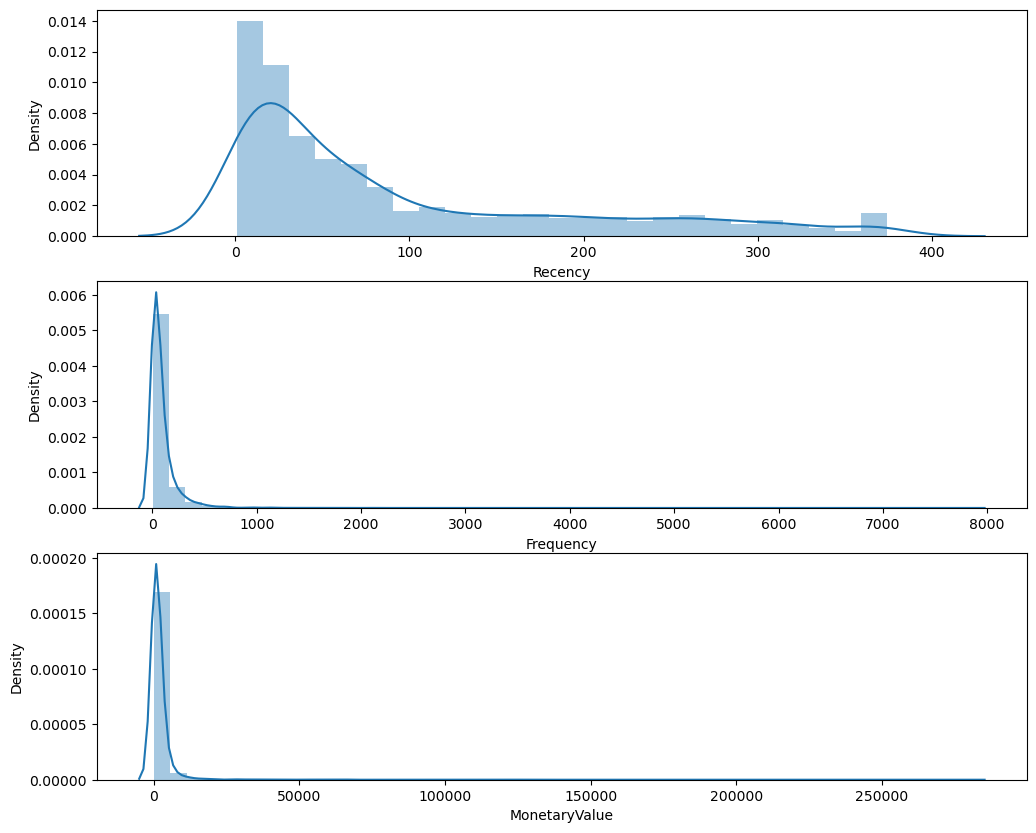

In [43]:
plt.figure(figsize=(12,10))

# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(rfm['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(rfm['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(rfm['MonetaryValue'])

# Show the plot
plt.show()

In [44]:
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(rfm[x], ax=ax[0,0])
    sns.distplot(np.log(rfm[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(rfm[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(rfm[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    
#     print(rfm[x].skew().round(2))
#     print(np.log(rfm[x]).skew().round(2))
#     print(np.sqrt(rfm[x]).skew().round(2))
#     print(pd.Series(stats.boxcox(rfm[x])[0]).skew().round(2))
    
    print('Log Transform : The skew coefficient of', rfm[x].skew().round(2), 'to', np.log(rfm[x]).skew().round(2))
    print('Square Root Transform : The skew coefficient of', rfm[x].skew().round(2), 'to', np.sqrt(rfm[x]).skew().round(2))
    print('Box-Cox Transform : The skew coefficient of', rfm[x].skew().round(2), 'to', pd.Series(stats.boxcox(rfm[x])[0]).skew().round(2))

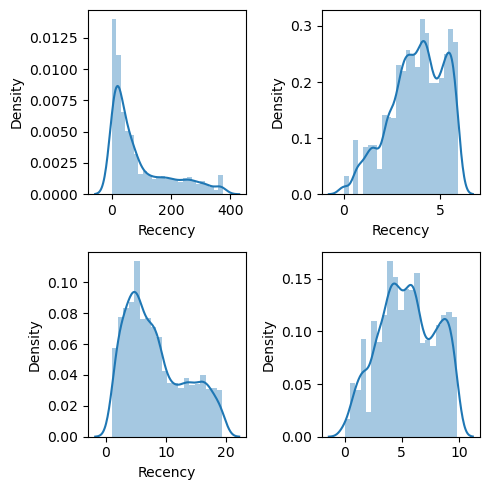

Log Transform : The skew coefficient of 1.25 to -0.47
Square Root Transform : The skew coefficient of 1.25 to 0.6
Box-Cox Transform : The skew coefficient of 1.25 to -0.06


In [45]:
analyze_skewness('Recency')

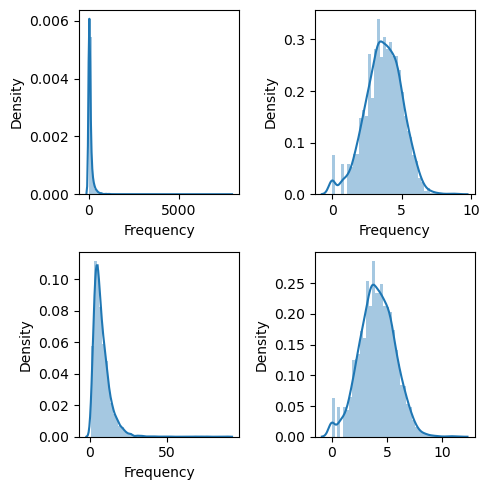

Log Transform : The skew coefficient of 18.11 to -0.22
Square Root Transform : The skew coefficient of 18.11 to 3.22
Box-Cox Transform : The skew coefficient of 18.11 to 0.0


In [46]:
analyze_skewness('Frequency')

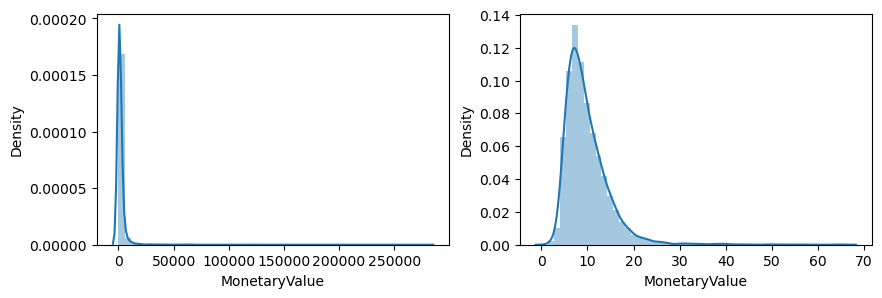

19.32
3.0


In [47]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
sns.distplot(rfm['MonetaryValue'], ax=ax[0])
sns.distplot(np.cbrt(rfm['MonetaryValue']), ax=ax[1])
plt.show()
print(rfm['MonetaryValue'].skew().round(2))
print(np.cbrt(rfm['MonetaryValue']).skew().round(2))

In [48]:
pd.Series(np.cbrt(rfm['MonetaryValue'])).values

array([42.57699537, 16.27392924, 12.15818345, ...,  5.62575299,
       12.79537593, 12.24781024])

In [49]:
# Set the Numbers
from scipy import stats
customers_fix = pd.DataFrame()
customers_fix["Recency"] = stats.boxcox(rfm['Recency'])[0]
customers_fix["Frequency"] = stats.boxcox(rfm['Frequency'])[0]
customers_fix["MonetaryValue"] = pd.Series(np.cbrt(rfm['MonetaryValue'])).values
customers_fix.tail()

Recency  Frequency  MonetaryValue
4333  9.087337   2.444553       5.652483
4334  8.074647   2.046672       4.323541
4335  2.463319   2.650775       5.625753
4336  1.550488   7.898631      12.795376
4337  5.143594   4.748687      12.247810

In [50]:
# Import library
from sklearn.preprocessing import StandardScaler
# Initialize the Object
scaler = StandardScaler()
# Fit and Transform The Data
scaler.fit(customers_fix)
customers_normalized = scaler.transform(customers_fix)
# Assert that it has mean 0 and variance 1
print(customers_normalized.mean(axis = 0).round(2)) 
print(customers_normalized.std(axis = 0).round(2)) 

[-0. -0.  0.]
[1. 1. 1.]


In [51]:
pd.DataFrame(customers_normalized).head()

0         1         2
0  1.620274 -2.571781  6.610156
1 -1.738803  1.166178  1.291756
2  0.299813 -0.218983  0.459565
3 -0.703409  0.435521  0.441334
4  1.572616 -0.661173 -0.595333

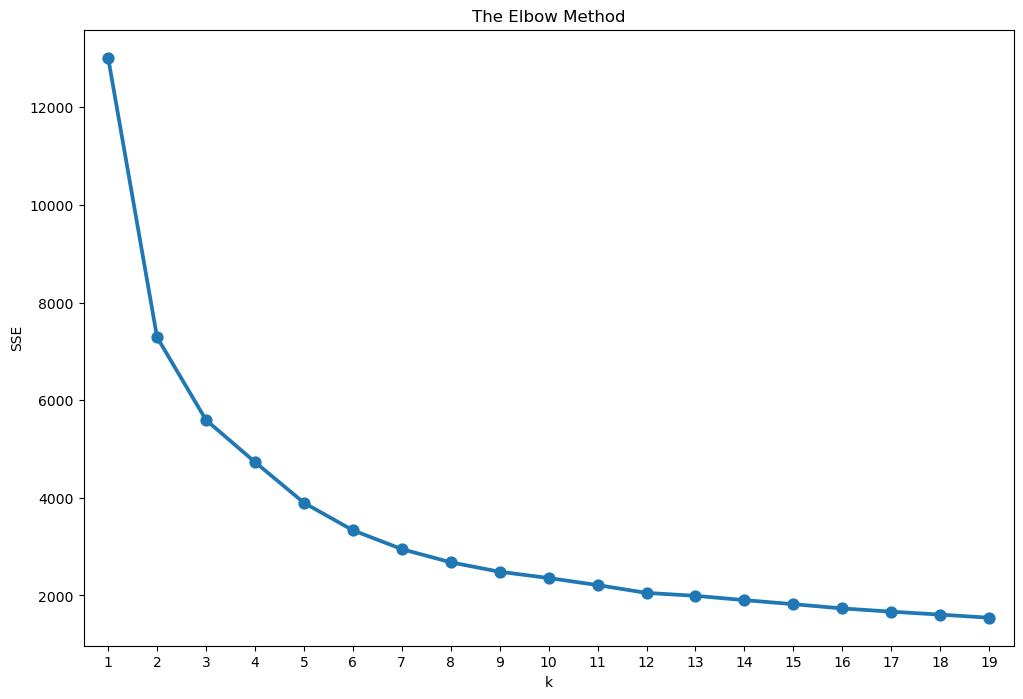

In [52]:
plt.figure(figsize=(12,8))

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
K = range(1, 20)

distortions = []
inertias = []
mapping1 = {}
sse = {}
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    
    distortions.append(sum(np.min(cdist(customers_normalized, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / customers_normalized.shape[0])
    inertias.append(kmeans.inertia_)
 
    mapping1[k] = sum(np.min(cdist(customers_normalized, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / customers_normalized.shape[0]
    
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [53]:
for key, val in mapping1.items():
    print(f'{key} : {val}')


1 : 1.4947276607895021
2 : 1.1167239633417236
3 : 0.9714720818308448
4 : 0.8845492013913674
5 : 0.8398758570587448
6 : 0.7763847578348314
7 : 0.7310366862349765
8 : 0.6917180912658778
9 : 0.6617860804088636
10 : 0.6533012313778142
11 : 0.6290641377695059
12 : 0.6051492240932544
13 : 0.5951216553090497
14 : 0.5816632212671846
15 : 0.5713041402548406
16 : 0.5546706154030641
17 : 0.5438751680540516
18 : 0.5376395708976267
19 : 0.5275621468438251


In [54]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(customers_normalized)
model.labels_.shape

(4338,)

In [55]:
rfm.shape

(4338, 4)

In [56]:
rfm["Cluster"] = model.labels_
rfm.head()

CustomerID  Recency  Frequency  MonetaryValue  Cluster
0     12346.0      326          1       77183.60        1
1     12347.0        3        182        4310.00        1
2     12348.0       76         31        1797.24        0
3     12349.0       19         73        1757.55        0
4     12350.0      311         17         334.40        2

In [57]:
rfm.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          43.1      66.7        1040.9  1918
1          20.5     307.9        8136.5   771
2         185.1      19.7         389.2  1649

In [58]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(customers_normalized)
model.labels_.shape

rfm["Cluster"] = model.labels_
rfm.head()
rfm.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(1)


Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          27.4      29.9         551.6  1037
1          13.0     339.4        9444.0   613
2          61.8     102.7        1566.9  1285
3         205.2      19.2         382.6  1403

In [59]:
# Create the dataframe
df_normalized = pd.DataFrame(customers_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = rfm.index
df_normalized['Cluster'] = model.labels_
df_normalized.head()

Recency  Frequency  MonetaryValue  ID  Cluster
0  1.620274  -2.571781       6.610156   0        1
1 -1.738803   1.166178       1.291756   1        1
2  0.299813  -0.218983       0.459565   2        2
3 -0.703409   0.435521       0.441334   3        2
4  1.572616  -0.661173      -0.595333   4        3

In [60]:
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()

ID  Cluster Attribute     Value
0   0        1   Recency  1.620274
1   1        1   Recency -1.738803
2   2        2   Recency  0.299813
3   3        2   Recency -0.703409
4   4        3   Recency  1.572616

In [61]:
df_nor_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13014 entries, 0 to 13013
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         13014 non-null  int64  
 1   Cluster    13014 non-null  int32  
 2   Attribute  13014 non-null  object 
 3   Value      13014 non-null  float64
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 356.0+ KB


In [62]:
# Aggregate data by each customer
fig3 = df_nor_melt.groupby('Cluster').agg({'ID': lambda x: len(x)}).reset_index()


# Rename columns
fig3.rename(columns={'ID': 'Count'}, inplace=True)
fig3['percent'] = (fig3['Count'] / fig3['Count'].sum()) * 100
fig3['percent'] = fig3['percent'].round(1)

fig3.head()

Cluster  Count  percent
0        0   3111     23.9
1        1   1839     14.1
2        2   3855     29.6
3        3   4209     32.3

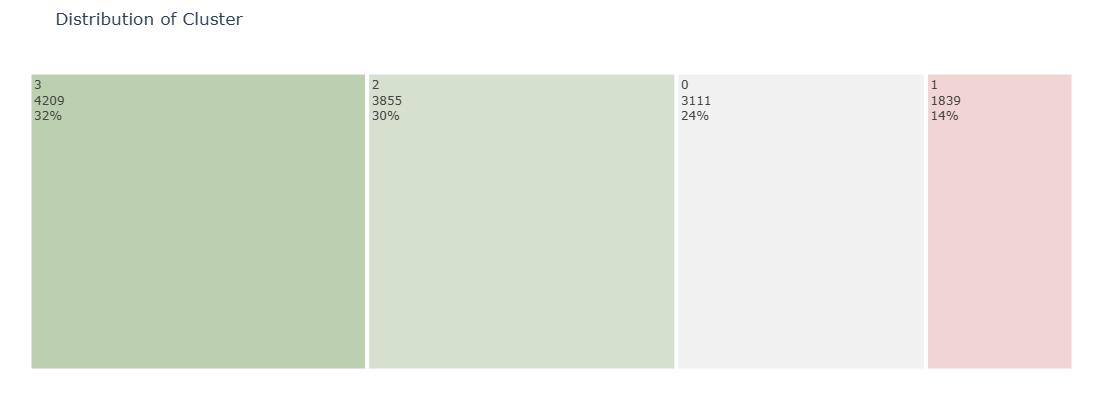

In [63]:
#Creating a Treemap with Plotly Express
# colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'] #color palette
colors=['#bad0af','#d5e0cf','#f1f1f1','#f1d4d4'] #color palette
import plotly.express as px

fig = px.treemap(fig3, path=['Cluster'],values='Count'
                 , width=800, height=400
                 ,title="Distribution of Cluster")

fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25))

fig.data[0].textinfo = 'label+text+value+percent root'
fig.show()

In [66]:
# Visualize it
sns.lineplot('Attribute', 'Value', hue='Cluster', data = df_nor_melt)

TypeError: lineplot() got multiple values for argument 'data'

<Axes: xlabel='Attribute', ylabel='Value'>

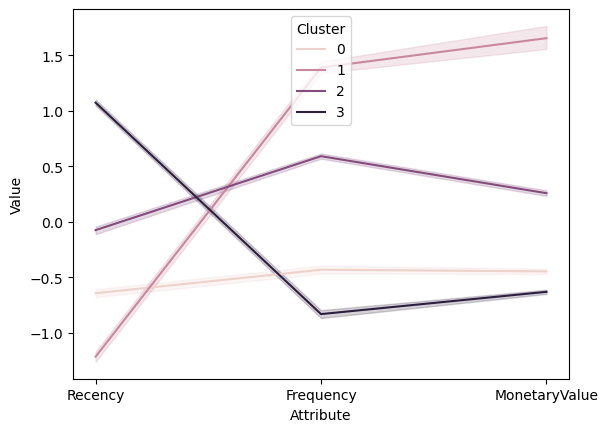

In [67]:
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=df_nor_melt)

In [68]:
rfm.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          27.4      29.9         551.6  1037
1          13.0     339.4        9444.0   613
2          61.8     102.7        1566.9  1285
3         205.2      19.2         382.6  1403

In [69]:
cluster_avg = rfm.groupby('Cluster').mean()
population_avg = rfm.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp


Cluster  CustomerID  Frequency  MonetaryValue   Recency
Cluster                                                         
0            NaN    0.003460  -0.674486      -0.731507 -0.705604
1            NaN   -0.008813   2.700275       3.597239 -0.860304
2            NaN   -0.000917   0.119760      -0.237251 -0.336335
3            NaN    0.002133  -0.790961      -0.813733  1.205466

In [70]:
rfm_fig = rfm.copy()

#Remove the outlier for visualization
y1 = rfm_fig['Frequency']
size = rfm_fig.shape[0]
removed_outliers = y1.between(y1.quantile(.05), y1.quantile(.95))
print(str(y1[removed_outliers].size) + "/" + str(size) + " data points remain.") 
index_names = rfm_fig[~removed_outliers].index 
rfm_fig.drop(index_names, inplace=True)

#Remove the outlier for visualization
y2 = rfm_fig['Recency']
size = rfm_fig.shape[0]
removed_outliers = y2.between(y2.quantile(.05), y2.quantile(.95))
print(str(y2[removed_outliers].size) + "/" + str(size) + " data points remain.") 
index_names = rfm_fig[~removed_outliers].index 
rfm_fig.drop(index_names, inplace=True)

#Remove the outlier for visualization
y3 = rfm_fig['MonetaryValue']
size = rfm_fig.shape[0]
removed_outliers = y3.between(y3.quantile(.05), y3.quantile(.95))
print(str(y3[removed_outliers].size) + "/" + str(size) + " data points remain.") 
index_names = rfm_fig[~removed_outliers].index 
rfm_fig.drop(index_names, inplace=True)

3942/4338 data points remain.
3579/3942 data points remain.
3221/3579 data points remain.


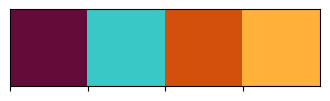

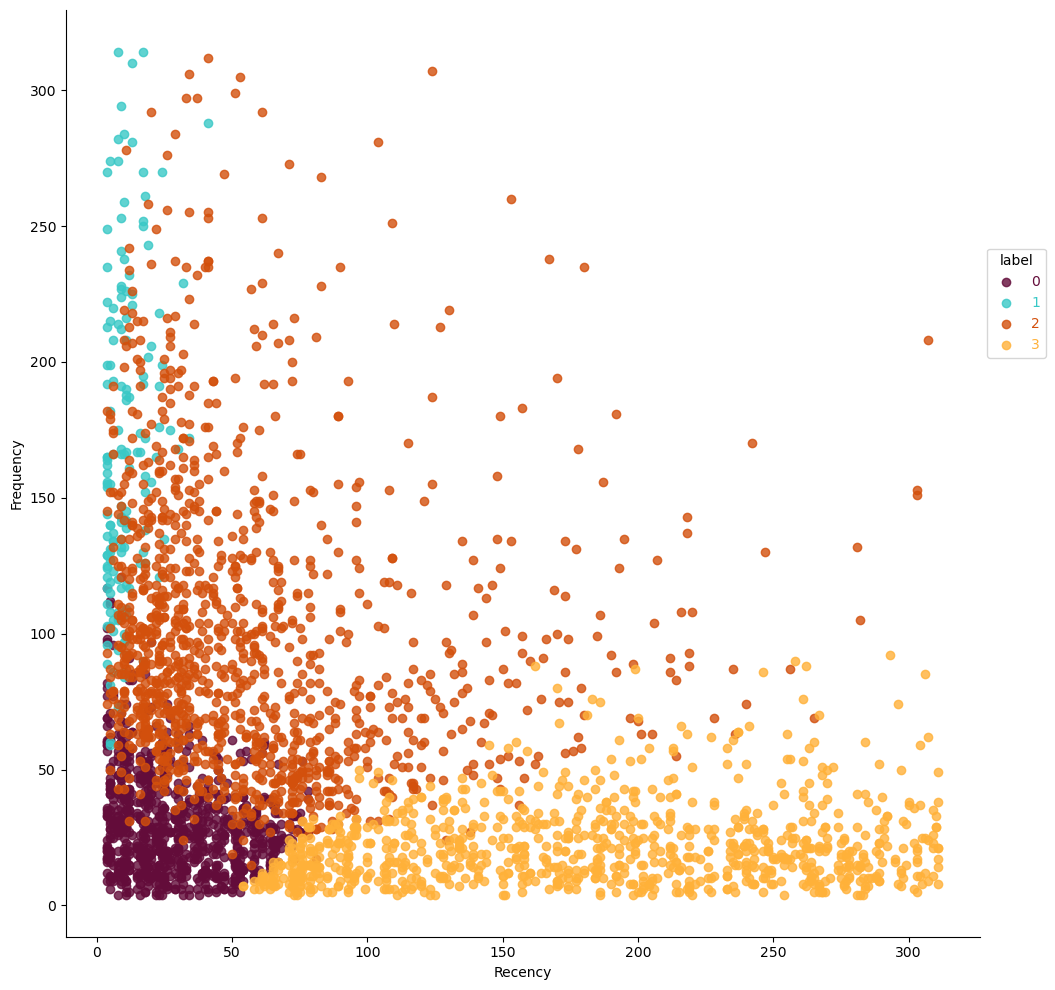

In [71]:
#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)

data = pd.DataFrame(data=rfm_fig,columns=['Customer ID','Cluster','Recency','Frequency','MonetaryValue'])

#plot data with seaborn (don't add a legend yet)
facet = sns.lmplot(data=data, x='Recency', y='Frequency', hue='Cluster', height=10,
                   fit_reg=False, legend=False)

#add a legend
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="label", fancybox=True)
#change colors of labels
for i, text in enumerate(leg.get_texts()):
    plt.setp(text, color = customPalette[i])

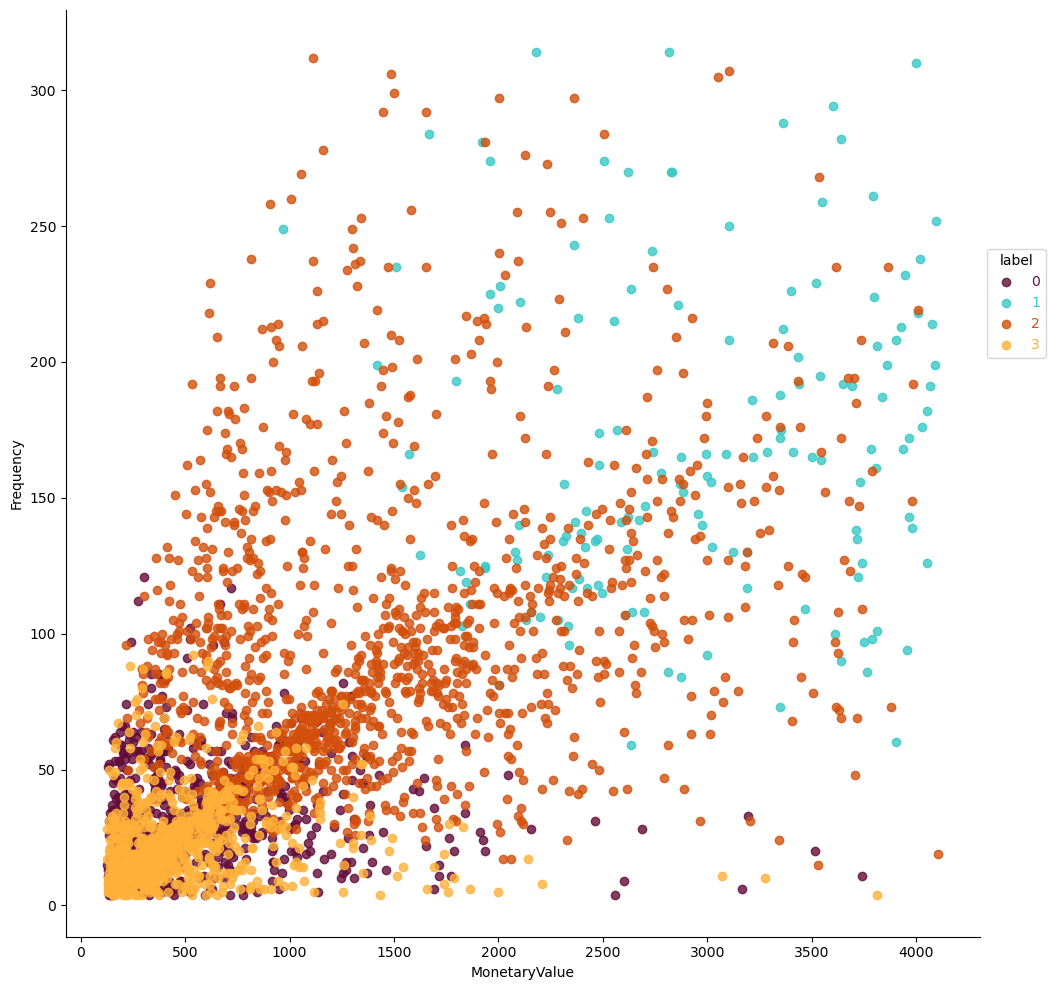

In [72]:
# fig, ax = plt.subplots(figsize=(10, 8))
#plot data with seaborn (don't add a legend yet)
facet = sns.lmplot(data=data, x='MonetaryValue', y='Frequency', hue='Cluster', height=10,
                   fit_reg=False, legend=False)

#add a legend
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="label", fancybox=True)
#change colors of labels
for i, text in enumerate(leg.get_texts()):
    plt.setp(text, color = customPalette[i])

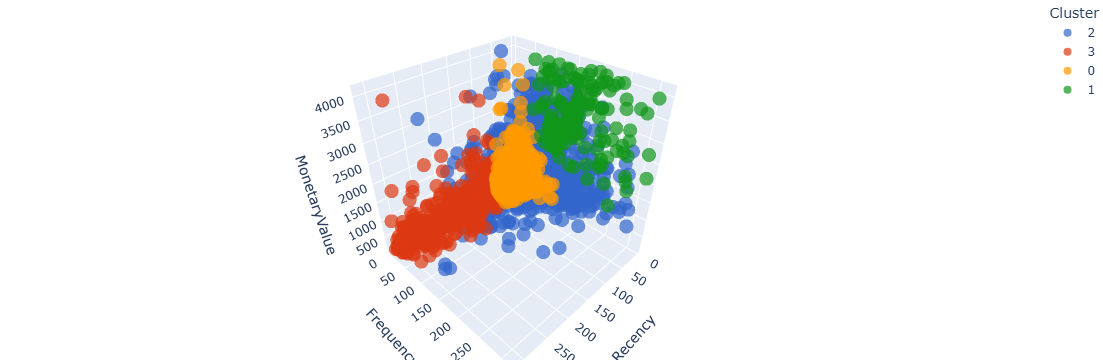

In [73]:
rfm_fig['Cluster'] = rfm_fig['Cluster'].astype(str)

import plotly.express as px
fig = px.scatter_3d(rfm_fig,x='Recency', y='Frequency', z='MonetaryValue',
              color='Cluster', opacity=0.7,color_discrete_sequence=px.colors.qualitative.G10)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [74]:
cluster_avg = rfm[['Cluster','Recency','Frequency','MonetaryValue']].groupby(['Cluster']).mean()
population_avg = rfm[['Recency','Frequency','MonetaryValue']].head().mean()
cluster_avg

Recency   Frequency  MonetaryValue
Cluster                                       
0         27.396336   29.856316     551.556878
1         13.000000  339.391517    9443.952887
2         61.760311  102.705058    1566.890040
3        205.239487   19.173200     382.641911

In [75]:
population_avg

Recency            147.000
Frequency           60.800
MonetaryValue    17076.558
dtype: float64

In [76]:
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

Recency  Frequency  MonetaryValue
Cluster                                   
0          -0.81      -0.51          -0.97
1          -0.91       4.58          -0.45
2          -0.58       0.69          -0.91
3           0.40      -0.68          -0.98

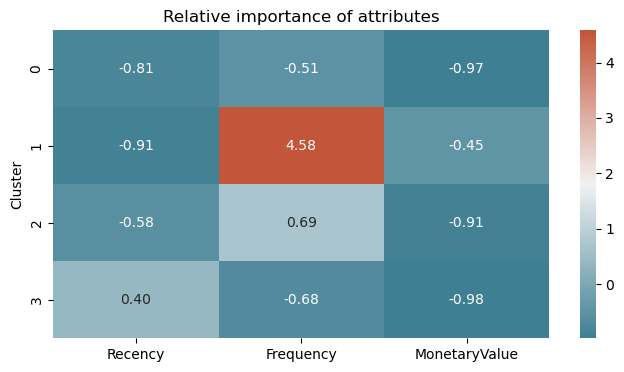

In [77]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)
# Plot heatmap
plt.figure(figsize=(8, 4))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap=cmap)
plt.show()

In [78]:
# Create the quartiles scores
quantiles = rfm.quantile(q=[0.2,0.4,0.6,0.8])
quantiles = quantiles.to_dict()
    
def RScore(x,p,d):
    if x <= d[p][0.2]:
        return 5
    elif x <= d[p][0.4]:
        return 4
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]: 
        return 2
    else:
        return 1   
    
def FMScore(x,p,d):
    if x <= d[p][0.2]:
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]: 
        return 4
    else:
        return 5
    
rfm['R'] = rfm['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm['F'] = rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm['M'] = rfm['MonetaryValue'].apply(FMScore, args=('MonetaryValue',quantiles,))

In [ ]:
# Create the quartiles scores
quantiles = rfm.quantile(q=[0.2,0.4,0.6,0.8])
quantiles = quantiles.to_dict()
    
def RScore(x,p,d):
    if x <= d[p][0.2]:
        return 5
    elif x <= d[p][0.4]:
        return 4
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]: 
        return 2
    else:
        return 1   
    
def FMScore(x,p,d):
    if x <= d[p][0.2]:
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]: 
        return 4
    else:
        return 5
    
rfm['R'] = rfm['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm['F'] = rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm['M'] = rfm['MonetaryValue'].apply(FMScore, args=('MonetaryValue',quantiles,))

In [79]:
# Concat RFM quartile values to create RFM Segments
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
rfm['RFM_Segment'] = rfm.apply(join_rfm, axis=1)
# Calculate RFM_Score
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)
rfm['RFM_Segment'].unique()

array(['1.01.05.0', '5.05.05.0', '2.03.04.0', '4.04.04.0', '1.02.02.0',
       '3.04.05.0', '1.01.01.0', '1.03.04.0', '1.01.02.0', '4.04.05.0',
       '3.05.05.0', '5.02.04.0', '2.02.03.0', '5.04.04.0', '1.02.03.0',
       '5.01.01.0', '3.04.04.0', '3.03.04.0', '4.03.03.0', '5.02.02.0',
       '1.04.04.0', '2.05.05.0', '2.03.03.0', '4.02.03.0', '4.04.02.0',
       '2.04.04.0', '3.02.04.0', '4.05.05.0', '3.01.02.0', '2.04.05.0',
       '3.03.03.0', '3.02.03.0', '5.05.04.0', '1.03.03.0', '5.04.05.0',
       '2.03.05.0', '4.01.01.0', '3.02.02.0', '2.01.01.0', '4.02.02.0',
       '3.02.05.0', '5.03.03.0', '5.03.04.0', '2.02.02.0', '2.01.04.0',
       '1.05.05.0', '4.01.02.0', '1.02.01.0', '2.02.04.0', '3.03.01.0',
       '3.01.01.0', '4.02.01.0', '4.03.04.0', '3.04.03.0', '4.03.05.0',
       '5.01.02.0', '3.05.03.0', '3.02.01.0', '1.04.05.0', '4.01.03.0',
       '4.03.02.0', '2.02.05.0', '2.03.02.0', '5.03.05.0', '5.02.03.0',
       '5.04.03.0', '2.05.03.0', '1.01.04.0', '5.01.05.0', '3.03

In [80]:
# Create human friendly RFM labels
segt_map = {
    
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At risk',
    r'[1-2]5': 'Can\'t lose them',
    r'3[1-2]': 'About to sleep',
    r'33': 'Need attention',
    r'[3-4][4-5]': 'Loyal customers',
    r'41': 'Promising',
    r'51': 'New customers',
    r'[4-5][2-3]': 'Potential loyalists',
    r'5[4-5]': 'Champions'
}
# rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)+ rfm['M'].map(str)
rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
# Create some human friendly labels for the scores
rfm['Score'] = 'Green'
rfm.loc[rfm['RFM_Score']>5,'Score'] = 'Bronze' 
rfm.loc[rfm['RFM_Score']>7,'Score'] = 'Silver' 
rfm.loc[rfm['RFM_Score']>9,'Score'] = 'Gold' 
rfm.loc[rfm['RFM_Score']>10,'Score'] = 'Platinum'
# List the head of the table to view the 
rfm.head(5)

CustomerID  Recency  Frequency  MonetaryValue  Cluster  R  F  M  \
0     12346.0      326          1       77183.60        1  1  1  5   
1     12347.0        3        182        4310.00        1  5  5  5   
2     12348.0       76         31        1797.24        2  2  3  4   
3     12349.0       19         73        1757.55        2  4  4  4   
4     12350.0      311         17         334.40        3  1  2  2   

  RFM_Segment  RFM_Score          Segment     Score  
0   1.01.05.0          7      Hibernating    Bronze  
1   5.05.05.0         15        Champions  Platinum  
2   2.03.04.0          9          At risk    Silver  
3   4.04.04.0         12  Loyal customers  Platinum  
4   1.02.02.0          5      Hibernating     Green

In [81]:
# Create human friendly RFM labels
segt_map = {
    
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At risk',
    r'[1-2]5': 'Can\'t lose them',
    r'3[1-2]': 'About to sleep',
    r'33': 'Need attention',
    r'[3-4][4-5]': 'Loyal customers',
    r'41': 'Promising',
    r'51': 'New customers',
    r'[4-5][2-3]': 'Potential loyalists',
    r'5[4-5]': 'Champions'
}
# rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)+ rfm['M'].map(str)
rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
# Create some human friendly labels for the scores
rfm['Score'] = 'Green'
rfm.loc[rfm['RFM_Score']>5,'Score'] = 'Bronze' 
rfm.loc[rfm['RFM_Score']>7,'Score'] = 'Silver' 
rfm.loc[rfm['RFM_Score']>9,'Score'] = 'Gold' 
rfm.loc[rfm['RFM_Score']>10,'Score'] = 'Platinum'
# List the head of the table to view the 
rfm.head(5)

CustomerID  Recency  Frequency  MonetaryValue  Cluster  R  F  M  \
0     12346.0      326          1       77183.60        1  1  1  5   
1     12347.0        3        182        4310.00        1  5  5  5   
2     12348.0       76         31        1797.24        2  2  3  4   
3     12349.0       19         73        1757.55        2  4  4  4   
4     12350.0      311         17         334.40        3  1  2  2   

  RFM_Segment  RFM_Score          Segment     Score  
0   1.01.05.0          7      Hibernating    Bronze  
1   5.05.05.0         15        Champions  Platinum  
2   2.03.04.0          9          At risk    Silver  
3   4.04.04.0         12  Loyal customers  Platinum  
4   1.02.02.0          5      Hibernating     Green

In [82]:
import seaborn as sns
sns.set_theme(style="whitegrid")
rfm.head()

CustomerID  Recency  Frequency  MonetaryValue  Cluster  R  F  M  \
0     12346.0      326          1       77183.60        1  1  1  5   
1     12347.0        3        182        4310.00        1  5  5  5   
2     12348.0       76         31        1797.24        2  2  3  4   
3     12349.0       19         73        1757.55        2  4  4  4   
4     12350.0      311         17         334.40        3  1  2  2   

  RFM_Segment  RFM_Score          Segment     Score  
0   1.01.05.0          7      Hibernating    Bronze  
1   5.05.05.0         15        Champions  Platinum  
2   2.03.04.0          9          At risk    Silver  
3   4.04.04.0         12  Loyal customers  Platinum  
4   1.02.02.0          5      Hibernating     Green

TypeError: countplot() got multiple values for argument 'data'

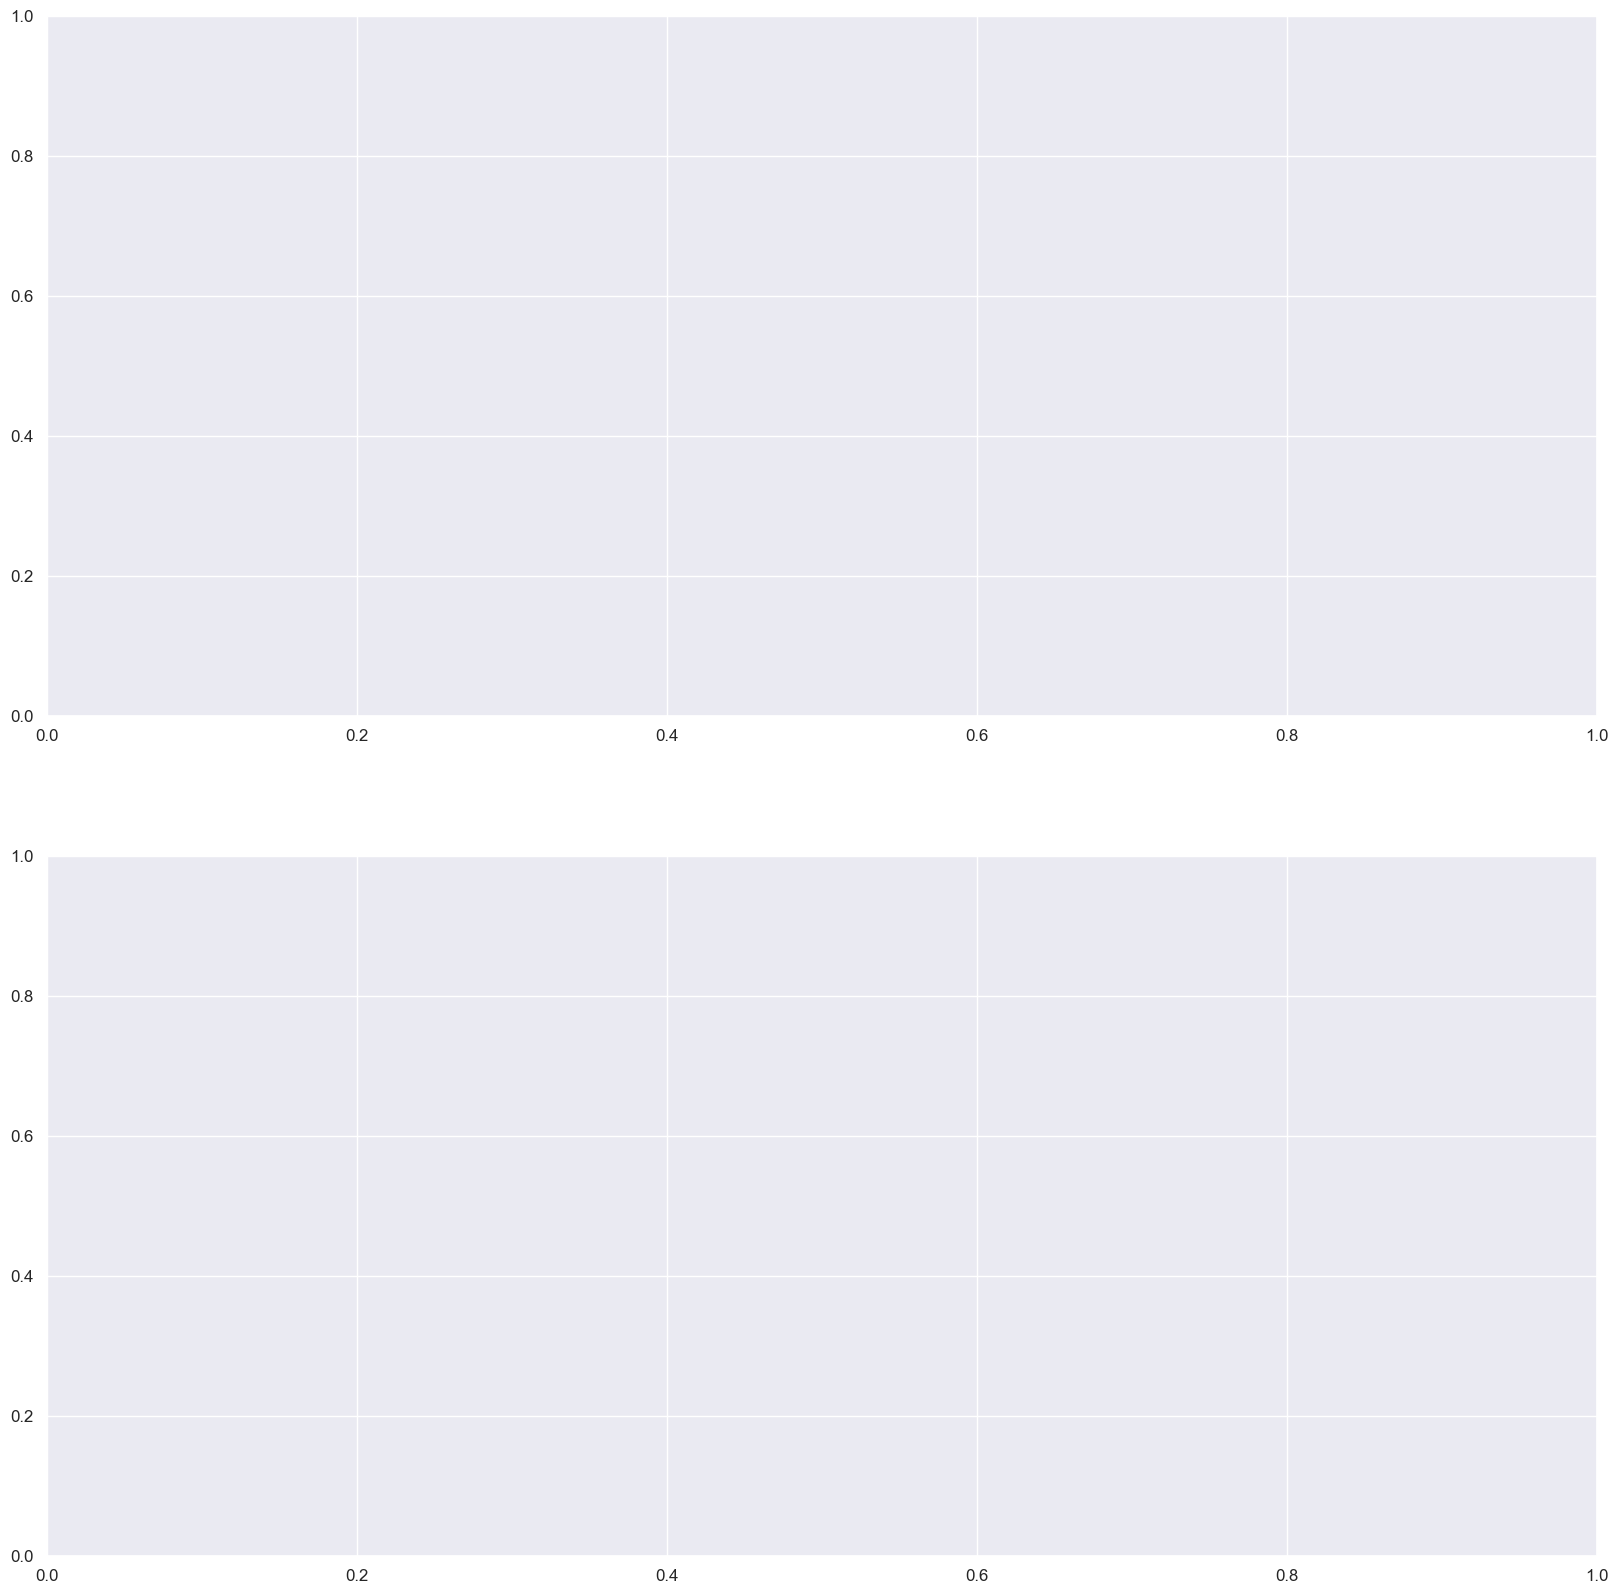

In [83]:
fig1 = rfm.groupby(['Segment']).count().unstack().fillna(0)
fig2 = rfm.groupby(['Score']).count().unstack().fillna(0)
import matplotlib.pyplot as plt


sns.set(font_scale=1.1)

#Pie Chart
f,ax=plt.subplots(2,1,figsize=(20,20))
sns.countplot('Segment',data=rfm,ax=ax[0],palette="Set3")
ax[0].set_title('Segment')
ax[0].set_ylabel('')
ax[0].set_title('Survival count by IsAlone')
# ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

#Bar chart - count
sns.countplot('Score',data=rfm,ax=ax[1],palette="Set3")
ax[1].set_title('Score')

for p in ax[0].patches:
    ax[0].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+20))

for p in ax[1].patches:
    ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+20))


plt.show()

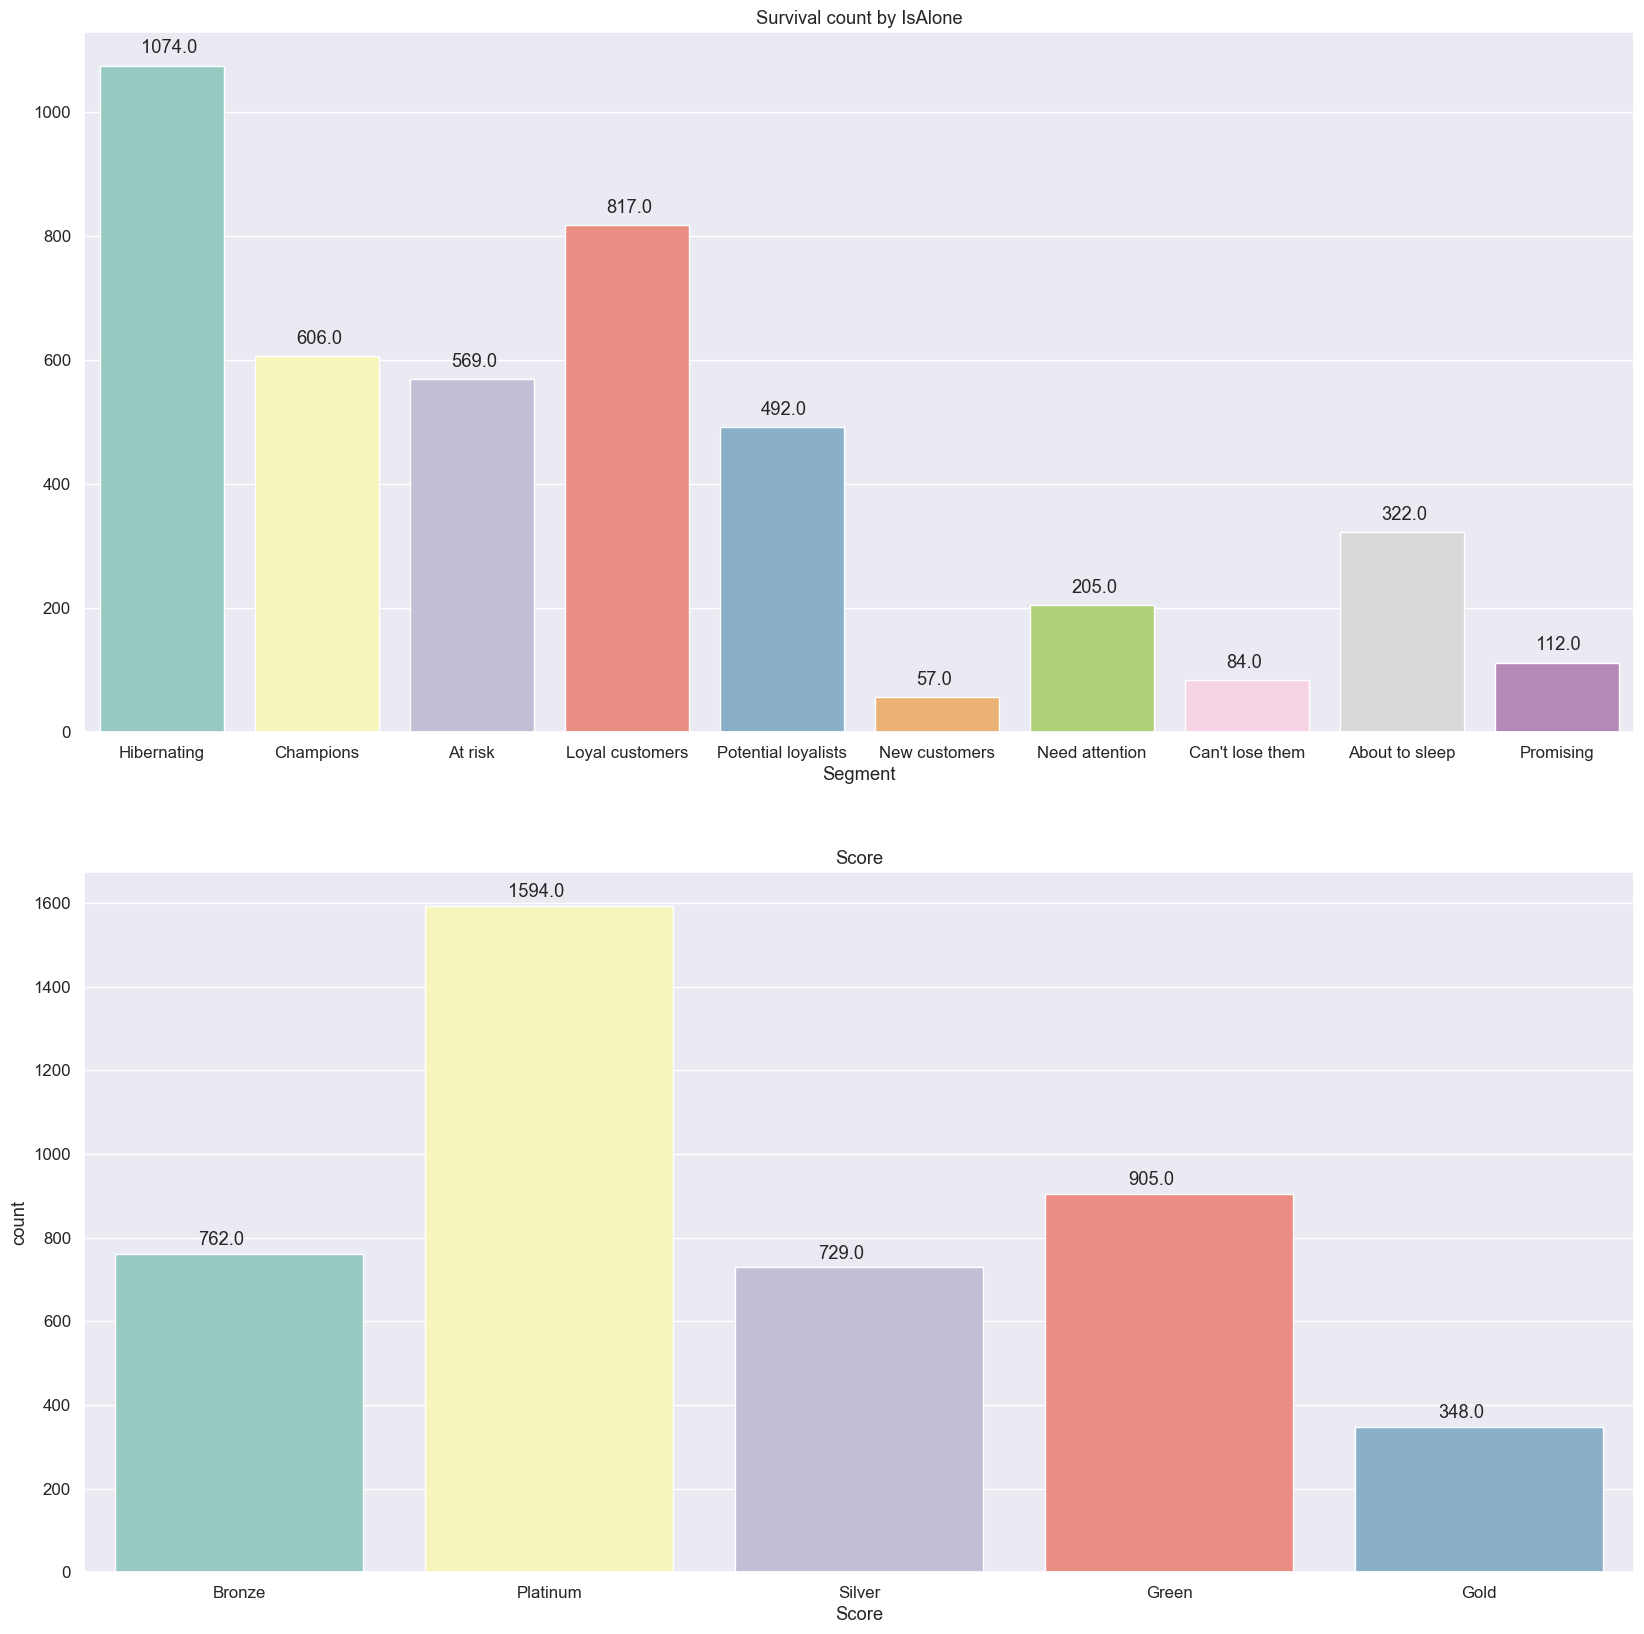

In [84]:
fig1 = rfm.groupby(['Segment']).count().unstack().fillna(0)
fig2 = rfm.groupby(['Score']).count().unstack().fillna(0)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.1)

# Pie Chart
f, ax = plt.subplots(2, 1, figsize=(20, 20))

sns.countplot(x='Segment', data=rfm, ax=ax[0], palette="Set3")
ax[0].set_title('Segment')
ax[0].set_ylabel('')
ax[0].set_title('Survival count by IsAlone')
# ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

# Bar chart - count
sns.countplot(x='Score', data=rfm, ax=ax[1], palette="Set3")
ax[1].set_title('Score')

for p in ax[0].patches:
    ax[0].annotate('{:.1f}'.format(p.get_height()), 
                   (p.get_x() + p.get_width()/3, p.get_height() + 20))

for p in ax[1].patches:
    ax[1].annotate('{:.1f}'.format(p.get_height()), 
                   (p.get_x() + p.get_width()/3, p.get_height() + 20))

plt.show()


In [87]:
# Aggregate data by each customer
fig3 = rfm.groupby('Segment').agg({'CustomerID': lambda x: len(x)}).reset_index()

# Rename columns
fig3.rename(columns={'CustomerID': 'Count'}, inplace=True)
fig3['percent'] = (fig3['Count'] / fig3['Count'].sum()) * 100
fig3['percent'] = fig3['percent'].round(1)

fig3.head()

Segment  Count  percent
0   About to sleep    322      7.4
1          At risk    569     13.1
2  Can't lose them     84      1.9
3        Champions    606     14.0
4      Hibernating   1074     24.8

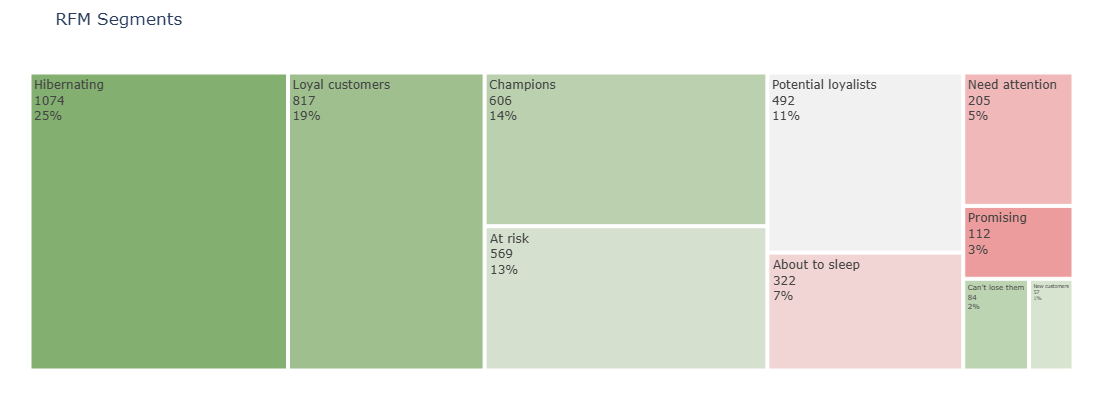

In [88]:
#Creating a Treemap with Plotly Express
# colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'] #color palette
colors=['#83af70','#9fbf8f','#bad0af','#d5e0cf','#f1f1f1','#f1d4d4','#f0b8b8','#ec9c9d'] #color palette
import plotly.express as px

fig = px.treemap(fig3, path=['Segment'],values='Count'
                 , width=800, height=400
                 ,title="RFM Segments")

fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25))

fig.data[0].textinfo = 'label+text+value+percent root'
fig.show()

In [90]:
# Aggregate data by each customer
fig4 = rfm.groupby('Score').agg({'CustomerID': lambda x: len(x)}).reset_index()


# Rename columns
fig4.rename(columns={'CustomerID': 'Count'}, inplace=True)
fig4['percent'] = (fig4['Count'] / fig4['Count'].sum()) * 100
fig4['percent'] = fig4['percent'].round(1)

fig4.head()

Score  Count  percent
0    Bronze    762     17.6
1      Gold    348      8.0
2     Green    905     20.9
3  Platinum   1594     36.7
4    Silver    729     16.8

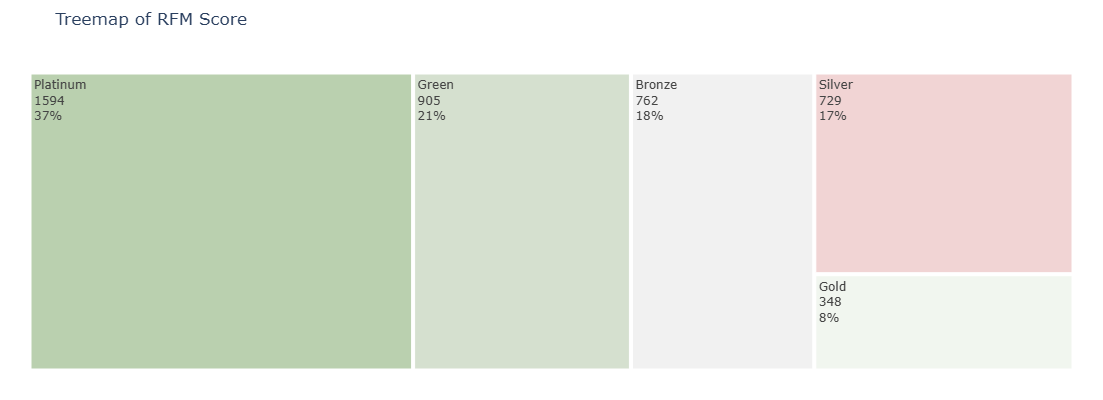

In [91]:
#Creating a Treemap with Plotly Express
# colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'] #color palette
colors=['#bad0af','#d5e0cf','#f1f1f1','#f1d4d4'] #color palette
import plotly.express as px

fig = px.treemap(fig4, path=['Score'],values='Count'
                 , width=800, height=400
                 ,title="Treemap of RFM Score")

fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25))

fig.data[0].textinfo = 'label+text+value+percent root'
fig.show()

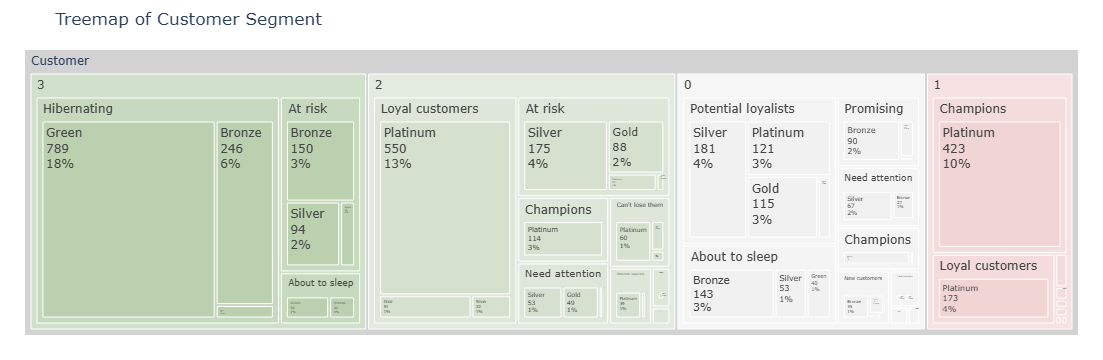

In [93]:
# Aggregate data by each customer
fig5 = rfm.groupby(['Cluster', 'Segment', 'Score']).agg({'CustomerID': lambda x: len(x)}).reset_index()

# Rename columns
fig5.rename(columns={'CustomerID': 'Count'}, inplace=True)
fig5['percent'] = (fig5['Count'] / fig5['Count'].sum()) * 100
fig5['percent'] = fig5['percent'].round(1)

fig5.head()
colors=['#bad0af','#d5e0cf','#f1f1f1','#f1d4d4'] #color palette
import plotly.express as px
fig = px.treemap(fig5, path=[px.Constant("Customer"), 'Cluster', 'Segment', 'Score'], values='Count'
                ,title="Treemap of Customer Segment")
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25))

fig.data[0].textinfo = 'label+text+value+percent root'
fig.show()

In [95]:
# Aggregate data by each customer
rfm1 = rfm.groupby(['Cluster','Segment'],).agg({'CustomerID': lambda x: len(x)}).reset_index()

# Rename columns
rfm1.rename(columns={'CustomerID': 'Count'}, inplace=True)
rfm1['percent'] = (rfm1['Count'] / rfm1.groupby('Cluster')['Count'].transform('sum')) * 100
rfm1['percent'] = rfm1['percent'].round(1)

rfm1

Cluster              Segment  Count  percent
0         0       About to sleep    236     22.8
1         0              At risk      6      0.6
2         0            Champions     69      6.7
3         0          Hibernating      4      0.4
4         0      Loyal customers     21      2.0
5         0       Need attention     96      9.3
6         0        New customers     55      5.3
7         0  Potential loyalists    438     42.2
8         0            Promising    112     10.8
9         1              At risk      1      0.2
10        1      Can't lose them      2      0.3
11        1            Champions    423     69.0
12        1          Hibernating      3      0.5
13        1      Loyal customers    173     28.2
14        1       Need attention      1      0.2
15        1        New customers      2      0.3
16        1  Potential loyalists      8      1.3
17        2       About to sleep      6      0.5
18        2              At risk    292     22.7
19        2      Can't lose them     82      6.4
20        2            Champions    114      8.9
21        2          Hibernating     14      1.1
22        2      Loyal customers    623     48.5
23        2       Need attention    108      8.4
24        2  Potential loyalists     46      3.6
25        3       About to sleep     80      5.7
26        3              At risk    270     19.2
27        3          Hibernating   1053     75.1